# Looking at data with Jupyter

What we cover today:
1. Running shell commands in jupyter
2. Importing data and looking at it: descriptive statistics and frequencies
3. Note on data cleansing
4. Plotting data with Seaborn ([docs](https://seaborn.pydata.org/))
5. ipywidgets ([docs](https://ipywidgets.readthedocs.io/en/latest/))

# A quick analysis of kickstarter projects
We look at a dataset of kickstarter project and we want to answer a few questions about it:
1. What are the most frequent categories?
2. How is the success rate per category?
3. Are there projects which exhibit a particular pattern of backers vs pledge?
4. Create a simple dashboard of category frequency for a selected country

## Use jupyter as a shell to see what we have

Before importing the data we quickly look at it to get a sense of the format and see if there is a header.
We also want to know how big the file is and how many lines it has before loading in memory.

In [1]:
ls -lh ks*

-rwxr-xr-x@ 1 ilariacattaneo  staff    44M Feb  8  2018 ks-projects-201612.csv*
-rwxr-xr-x@ 1 ilariacattaneo  staff    55M Feb  8  2018 ks-projects-201801.csv*


In [2]:
! head "ks-projects-201612.csv"

In [3]:
! wc -l ks-projects-201612.csv

  323751 ks-projects-201612.csv


## Reading the file

Encoding or other errors might happen. Errors can be handled in different ways (fail, ignore, replace, etc). See the documentation for refefence: https://docs.python.org/3/library/functions.html#open

In [4]:
import csv

with open("ks-projects-201612.csv", 'r') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',', quotechar='"')
    rows = [row for row in csvreader]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7955: invalid start byte

In [5]:
b'\x99'.decode('Windows-1252')

'™'

Data is from https://www.kaggle.com/kemical/kickstarter-projects

In [6]:
import ftfy
ftfy.guess_bytes(b'\x99')

ModuleNotFoundError: No module named 'ftfy'

## Importing the data and getting the columns

We import the data and create a header dictionary that will be handy to access data by column.
We also check the values for columns without a name.

In [7]:
import csv

with open("ks-projects-201612.csv", 'r', encoding='Windows-1252') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',', quotechar='"')
    rows = [row for row in csvreader]

In [8]:
raw_header = rows.pop(0)
raw_header

['ID ',
 'name ',
 'category ',
 'main_category ',
 'currency ',
 'deadline ',
 'goal ',
 'launched ',
 'pledged ',
 'state ',
 'backers ',
 'country ',
 'usd pledged ',
 '',
 '',
 '',
 '']

In [9]:
header = {}
for x in zip(range(len(raw_header)), [h.rstrip() for h in raw_header]):
    col_name = f"col_{x[0]}" if x[1] == '' else x[1]
    header[col_name] = x[0]
    
header

{'ID': 0,
 'name': 1,
 'category': 2,
 'main_category': 3,
 'currency': 4,
 'deadline': 5,
 'goal': 6,
 'launched': 7,
 'pledged': 8,
 'state': 9,
 'backers': 10,
 'country': 11,
 'usd pledged': 12,
 'col_13': 13,
 'col_14': 14,
 'col_15': 15,
 'col_16': 16}

In [10]:
header["index"] = 17
header

{'ID': 0,
 'name': 1,
 'category': 2,
 'main_category': 3,
 'currency': 4,
 'deadline': 5,
 'goal': 6,
 'launched': 7,
 'pledged': 8,
 'state': 9,
 'backers': 10,
 'country': 11,
 'usd pledged': 12,
 'col_13': 13,
 'col_14': 14,
 'col_15': 15,
 'col_16': 16,
 'index': 17}

In [11]:
for i in range(len(rows)):
    rows[i].append(i)
rows[100]

['1000465399',
 'DAYTRADER - A Financial Board Game',
 'Tabletop Games',
 'Games',
 'USD',
 '2013-03-13 15:16:06',
 '19500',
 '2013-02-05 16:16:06',
 '20269',
 'successful',
 '491',
 'US',
 '20269',
 '',
 '',
 '',
 '',
 100]

In [12]:
from collections import Counter

empty_cols = [13,14,15,16]
jagged = []
for row in rows:
    jagged.extend([row[col] for col in empty_cols])
jagged_count = Counter(jagged)
jagged_count

Counter({'': 1294358,
         '504.94765278': 1,
         '3984': 1,
         '525': 2,
         '0': 104,
         '3035': 1,
         '4986.41798748': 1,
         '590': 1,
         '23924': 1,
         '12306': 1,
         '13675': 1,
         '3.39594898': 1,
         '4690': 1,
         '4488.01': 1,
         '687': 1,
         '450': 1,
         '11719': 1,
         '126.9669968': 1,
         '1495': 1,
         '20': 6,
         '14309.36': 1,
         'US': 11,
         '8542': 1,
         '3363': 1,
         '950': 1,
         '1800.5': 1,
         '352': 1,
         '1320': 1,
         '18': 1,
         '2161': 1,
         '331': 1,
         '13446.90533288': 1,
         '2630': 1,
         '1847.3965377': 1,
         '3711': 1,
         '103': 1,
         '8609.6': 1,
         '312': 1,
         '11044': 2,
         '5600.65': 1,
         '630': 1,
         '1010': 1,
         '178': 1,
         '2006.0578219': 1,
         '3671': 1,
         '65': 6,
         '5': 8,
     

In [13]:
tot = sum(jagged_count.values())
jagged_perc = { k:v/tot for k,v in jagged_count.items()}
jagged_perc
sorted(jagged_perc.items(), key=lambda x : x[1], reverse=True)

[('', 0.9995042471042471),
 ('0', 8.03088803088803e-05),
 ('1', 1.081081081081081e-05),
 ('US', 8.494208494208494e-06),
 ('25', 8.494208494208494e-06),
 ('5', 6.177606177606177e-06),
 ('10', 6.177606177606177e-06),
 ('100', 5.405405405405405e-06),
 ('50', 5.405405405405405e-06),
 ('20', 4.633204633204633e-06),
 ('65', 4.633204633204633e-06),
 ('6', 3.0888030888030886e-06),
 ('55', 3.0888030888030886e-06),
 ('2', 3.0888030888030886e-06),
 ('125', 2.3166023166023166e-06),
 ('90', 2.3166023166023166e-06),
 ('200', 2.3166023166023166e-06),
 ('26', 2.3166023166023166e-06),
 ('30', 2.3166023166023166e-06),
 ('15', 2.3166023166023166e-06),
 ('21', 2.3166023166023166e-06),
 ('150', 2.3166023166023166e-06),
 ('35', 2.3166023166023166e-06),
 ('525', 1.5444015444015443e-06),
 ('11044', 1.5444015444015443e-06),
 ('2000', 1.5444015444015443e-06),
 ('166', 1.5444015444015443e-06),
 ('650', 1.5444015444015443e-06),
 ('45', 1.5444015444015443e-06),
 ('175', 1.5444015444015443e-06),
 ('325', 1.54440154

In [14]:
! grep "4986.41798748" ks-projects-201612.csv

How can we fix it? We can apply some heuristics exploiting the rest of the structure of the row, as for example the fact that category has a limited number of values, same for subcatory and currency; we can also exploit the fact that some columns are numbers and/or date.

In [15]:
from scipy import stats

backers = [int(row[header['backers']]) for row in rows if row[header['backers']].isdigit()]
stats.describe(backers)

DescribeResult(nobs=323126, minmax=(0, 219382), mean=101.63742007761678, variance=874050.752586457, skewness=90.95484621157802, kurtosis=14442.483313740122)

In [16]:
?stats.describe

In [17]:
bad_backers_rows = [(row[header['backers']], row[header['index']]) for row in rows if not row[header['backers']].isdigit()]
bad_backers_rows

[('failed', 1454),
 ('failed', 1563),
 ('failed', 1794),
 ('failed', 1931),
 ('successful', 2420),
 ('successful', 3079),
 ('failed', 4850),
 ('successful', 4871),
 ('successful', 5049),
 ('successful', 5813),
 ('failed', 6586),
 ('canceled', 7003),
 ('successful', 7639),
 ('failed', 7837),
 ('failed', 9998),
 ('successful', 10158),
 ('failed', 11236),
 ('failed', 11326),
 ('failed', 12061),
 ('failed', 12149),
 ('successful', 13968),
 ('failed', 14446),
 ('failed', 14640),
 ('successful', 15017),
 ('failed', 15288),
 ('canceled', 15872),
 ('successful', 15945),
 ('failed', 16081),
 ('failed', 17177),
 ('failed', 17710),
 ('successful', 17890),
 ('failed', 18084),
 ('failed', 18490),
 ('successful', 18650),
 ('failed', 18745),
 ('canceled', 20108),
 ('failed', 20142),
 ('failed', 20378),
 ('failed', 20409),
 ('successful', 20549),
 ('successful', 20642),
 ('failed', 20644),
 ('successful', 21539),
 ('failed', 22411),
 ('successful', 22537),
 ('successful', 22641),
 ('failed', 23163),
 

In [18]:
len(bad_backers_rows)

624

In [19]:
for x in zip(rows[1454], header.keys()):
    print("{0:<14}| {1}".format(x[1], x[0]))

ID            | 1008705746
name          | Zephyra´s new full length
category      |  'As The World Collapses'
main_category | Metal
currency      | Music
deadline      | SEK
goal          | 2016-02-02 00:56:46
launched      | 15000
pledged       | 2016-01-03 00:56:46
state         | 4262
backers       | failed
country       | 14
usd pledged   | SE
col_13        | 504.94765278
col_14        | 
col_15        | 
col_16        | 
index         | 1454


In [20]:
! grep "1008705746" ks-projects-201612.csv

In [21]:
main_categories = [row[header['main_category']] for row in rows]
sorted(Counter(main_categories).items(), key=lambda x : x[1], reverse=True)

[('Film & Video', 57679),
 ('Music', 46744),
 ('Publishing', 34233),
 ('Games', 28008),
 ('Technology', 26128),
 ('Art', 23975),
 ('Design', 23872),
 ('Food', 21229),
 ('Fashion', 18398),
 ('Theater', 9972),
 ('Photography', 9680),
 ('Comics', 8753),
 ('Crafts', 7187),
 ('Journalism', 4073),
 ('Dance', 3375),
 ('Fiction', 35),
 ('Product Design', 29),
 ('Documentary', 28),
 ('Nonfiction', 27),
 ("Children's Books", 18),
 ('Tabletop Games', 14),
 ('Shorts', 13),
 ('Video Games', 12),
 ('Mixed Media', 11),
 ('Art Books', 10),
 ('Apparel', 10),
 ('Web', 8),
 ('Narrative Film', 8),
 ('Country & Folk', 7),
 ('Hip-Hop', 7),
 ('Webseries', 7),
 ('Indie Rock', 7),
 ('Apps', 7),
 ('Hardware', 6),
 ('Poetry', 6),
 ('Sculpture', 6),
 ('Periodicals', 6),
 ('Digital Art', 6),
 ('Conceptual Art', 5),
 ('Pop', 5),
 ('Software', 5),
 ('Painting', 5),
 ('World Music', 4),
 ('Classical Music', 4),
 ('Performance Art', 4),
 ('Jazz', 4),
 ('Illustration', 4),
 ('Playing Cards', 3),
 ('Mobile Games', 3),
 

In [22]:
main_categories_set = { k for k,v in Counter(main_categories).items() if v > 3000}
main_categories_set

{'Art',
 'Comics',
 'Crafts',
 'Dance',
 'Design',
 'Fashion',
 'Film & Video',
 'Food',
 'Games',
 'Journalism',
 'Music',
 'Photography',
 'Publishing',
 'Technology',
 'Theater'}

In [23]:
rows_to_investigate = [row for row in rows if row[header['main_category']] not in main_categories_set]
rows_to_investigate

[['1008705746',
  'Zephyra´s new full length',
  " 'As The World Collapses'",
  'Metal',
  'Music',
  'SEK',
  '2016-02-02 00:56:46',
  '15000',
  '2016-01-03 00:56:46',
  '4262',
  'failed',
  '14',
  'SE',
  '504.94765278',
  '',
  '',
  '',
  1454],
 ['1009317190',
  'French Cuisine',
  ' A Traditional Experience',
  'Cookbooks',
  'Food',
  'USD',
  '2014-09-08 00:46:23',
  '13730',
  '2014-08-09 03:16:02',
  '3984',
  'failed',
  '46',
  'US',
  '3984',
  '',
  '',
  '',
  1563],
 ['1011687764',
  'Best OnLine Classifieds',
  ' Ever / No More Spam',
  'Web',
  'Technology',
  'USD',
  '2014-09-20 19:56:10',
  '6300',
  '2014-08-21 19:56:10',
  '0',
  'failed',
  '0',
  'US',
  '0',
  '',
  '',
  '',
  1931],
 ['101453314',
  'Social Media Ruined My Life',
  ' A Short Film from Adam S Curtis',
  'Shorts',
  'Film & Video',
  'USD',
  '2013-03-14 20:11:57',
  '3000',
  '2013-02-25 21:11:57',
  '3035',
  'successful',
  '42',
  'US',
  '3035',
  '',
  '',
  '',
  2420],
 ['1018515072

# A note on data cleansing

Data quality dimensions:
- accuracy: difficult to measure, often require domain knowledge. Looking at distributions helps
- completeness: difficult to measure, importance depend on the context
- Consistency
- Uniqueness
- Timeliness

There is the ** garbage in, garbage out principle** but the worst case is when data is wrong but looks reasonable.

## Definition

Data cleansing: detect & correct/remove bad records from a dataset.

In practice: detect incomplete, incorrect, inaccurate, partial or irrelevant data points and, depending on the situation and use case, replace, modify, fill in or delete this dirty data points.

## Steps

- Parse
- Correct
- Standardize
- Match
- Consolidate


## Openrefine

A useful tool for data cleansing is open refine: https://github.com/OpenRefine/OpenRefine


# Plotting the data with Seaborn

Seaborn is a python visualization library built on top of matplotlib, which provides a set of APIs that reduce the boilerplate required to produce matplotlib visualizations.

https://seaborn.pydata.org/


## Looking at the distribution of project categories

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", context="talk")
%config InlineBackend.figure_format = 'retina'

Creating a count plot of occurences can be done directly, without data manipulation

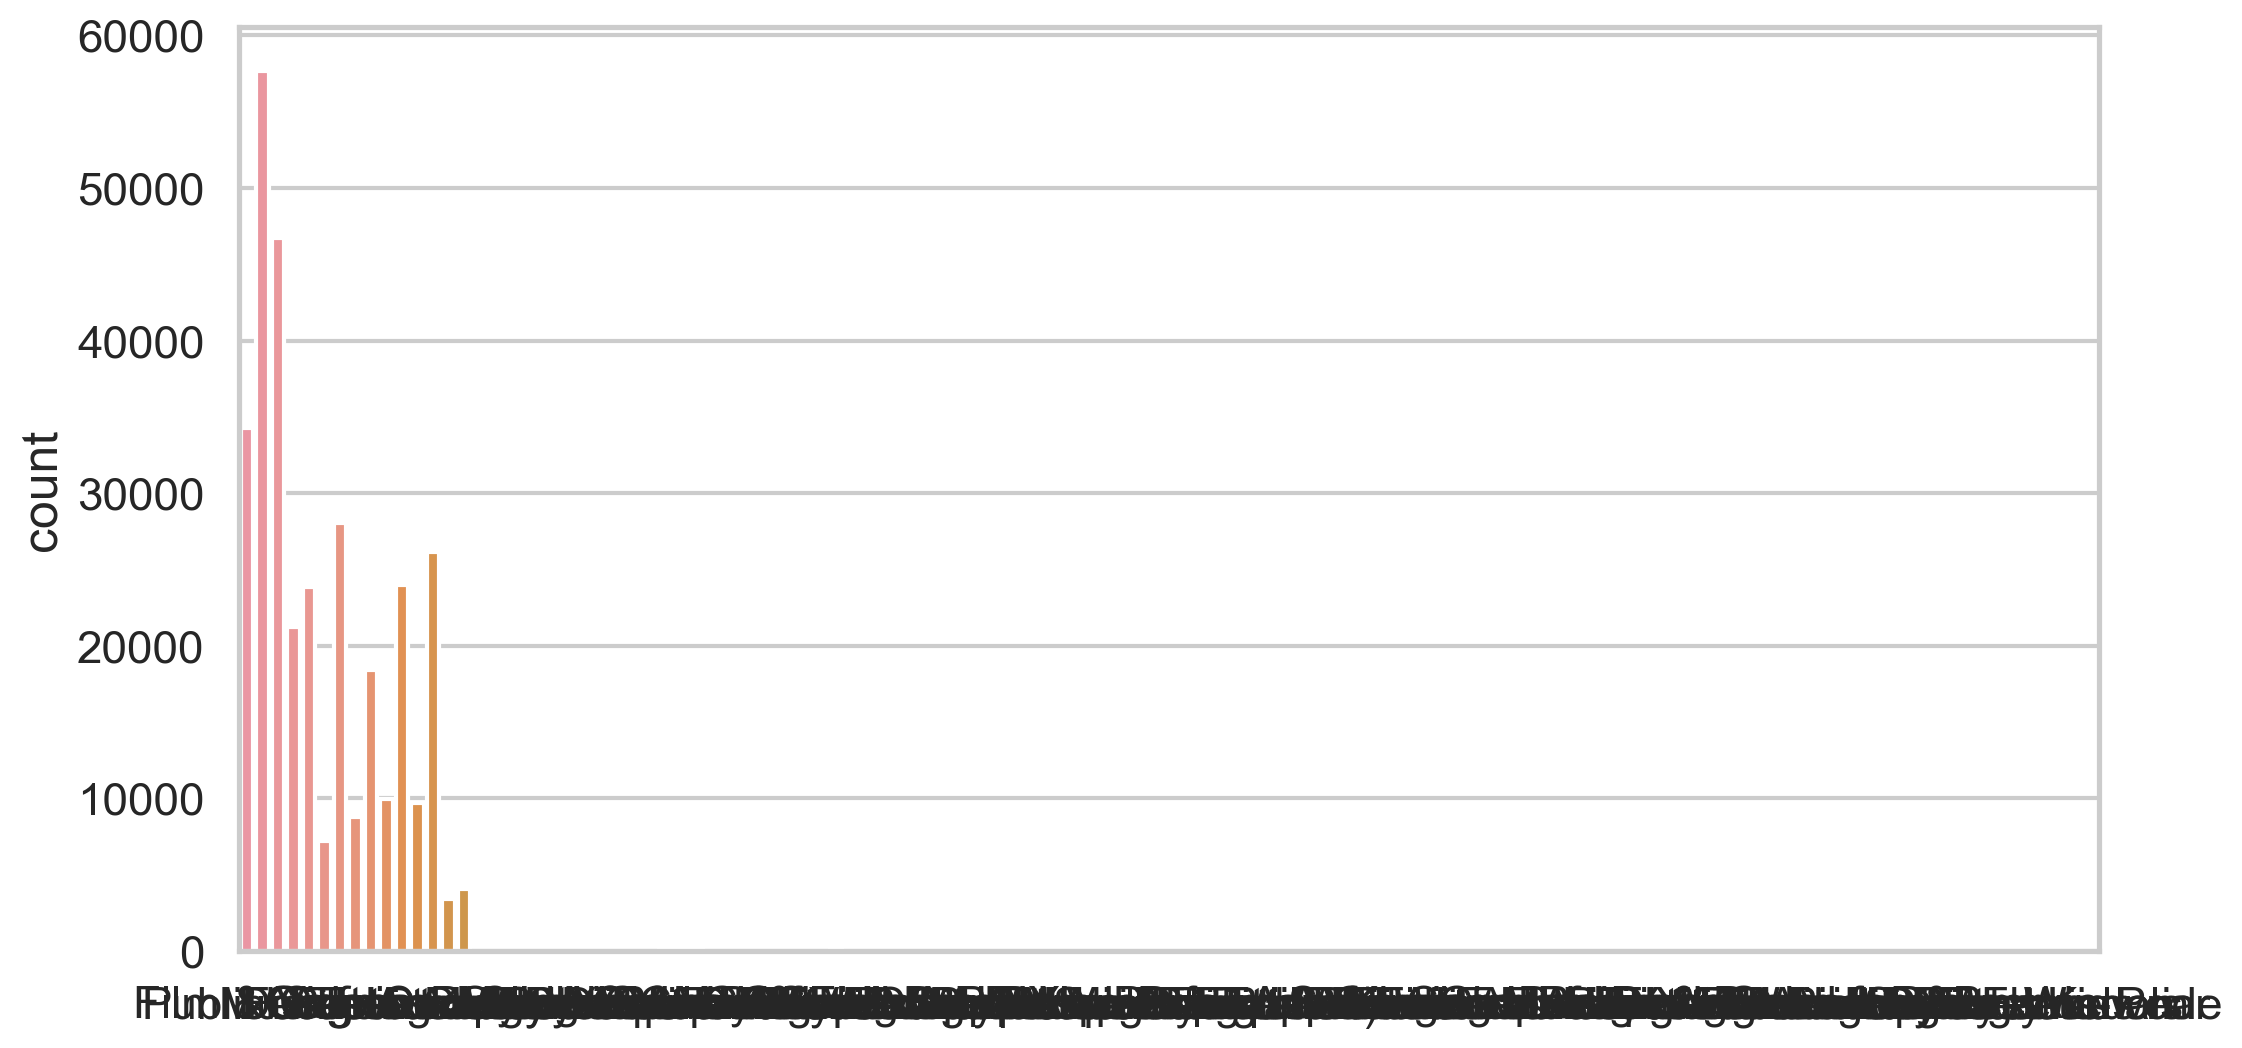

In [25]:
plt.subplots(figsize=(12,6))
project_main_category = [row[header['main_category']] for row in rows]
sns.countplot(x=project_main_category);


### Filtering out categories with low frequency

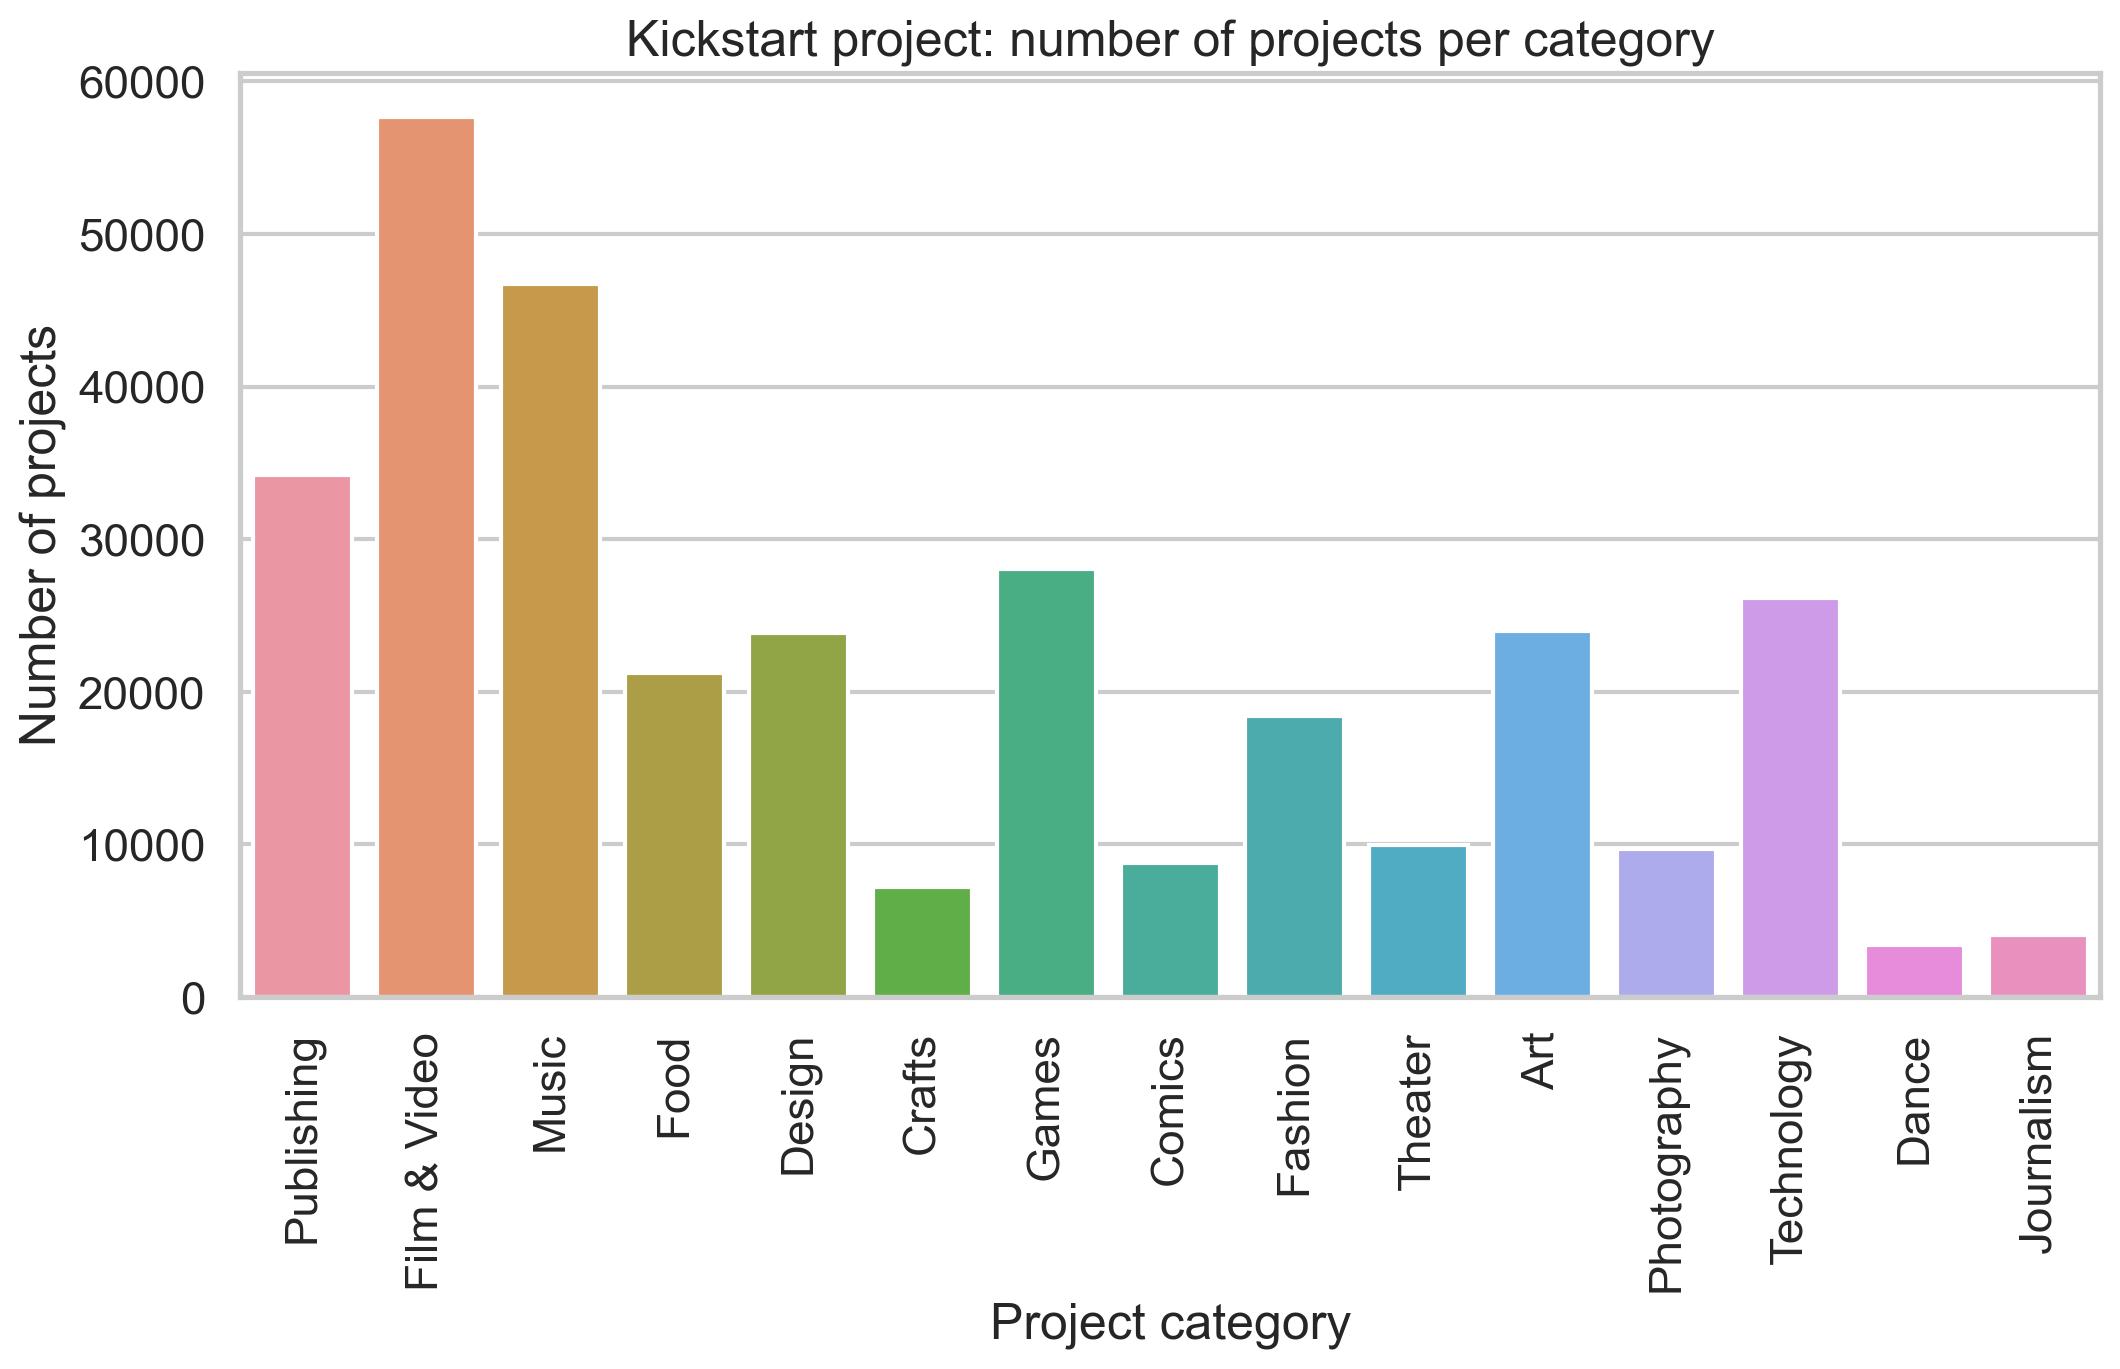

In [26]:
main_category_data = [cat for cat in main_categories if cat in main_categories_set]
plt.subplots(figsize=(12,6))
plot = sns.countplot(x=main_category_data);
plt.xticks(rotation=90)
plt.title("Kickstart project: number of projects per category")
plt.xlabel("Project category");
plt.ylabel("Number of projects");

# Exercise: how do you do this without the countplot?
#plot = sns.barplot(x=x, y=y)

See the [matplotlib documentation](https://matplotlib.org/stable/) for more details.

Let's make it more useful by sorting the data (from nominal comparison to ranking)

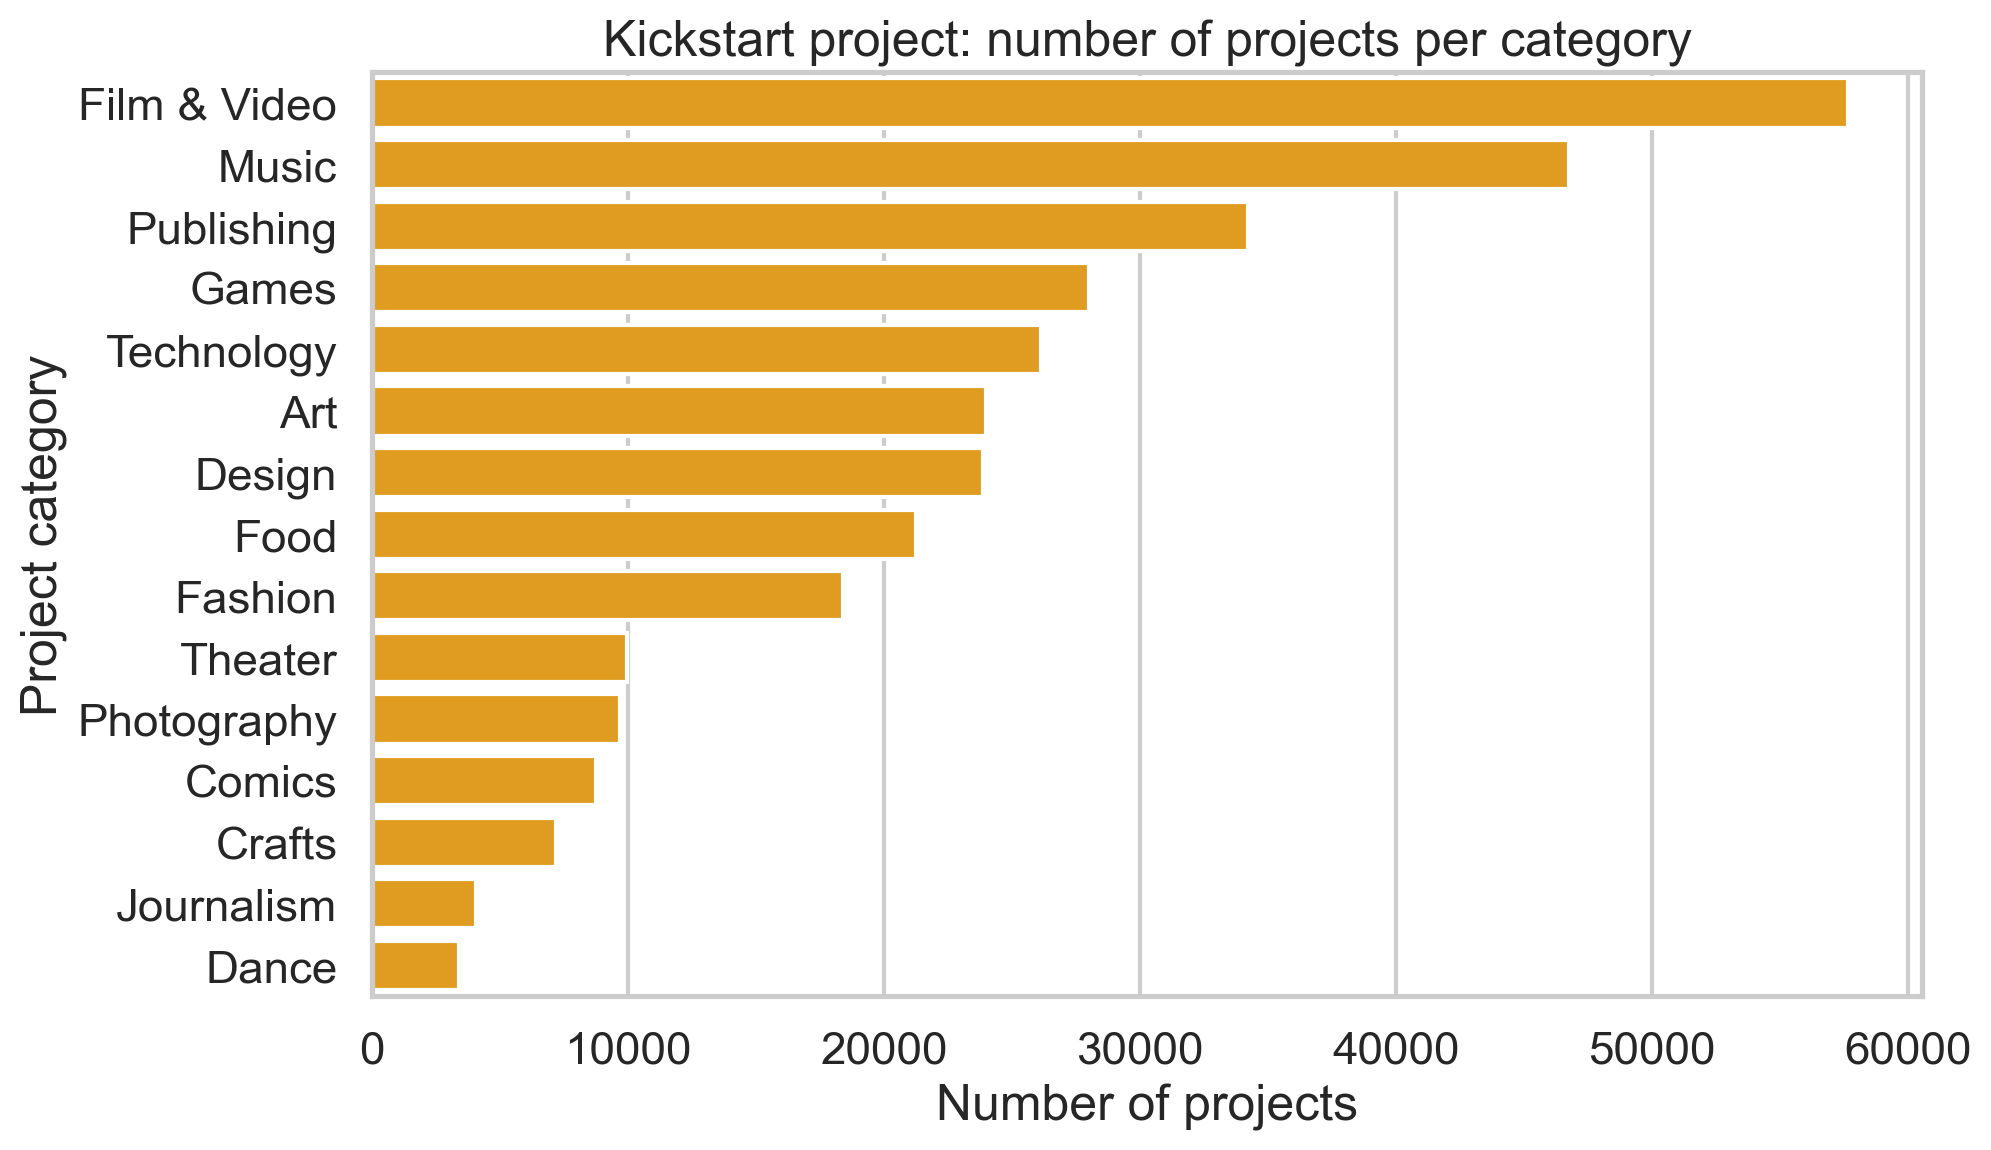

In [27]:
plt.subplots(figsize=(10,6))
sorted_categories = sorted(Counter(main_categories).items(), key=lambda x : x[1], reverse=True)
order = [x[0] for x in sorted_categories if x[1] > 3000]
plot = sns.countplot(y=main_category_data, color="orange", order=order)
plt.title("Kickstart project: number of projects per category")
plt.ylabel("Project category");
plt.xlabel("Number of projects");

### Looking at success rate per category

In [28]:
success_dict = Counter([row[header["state"]] for row in rows])    
sorted(success_dict.items(), key=lambda x: x[1], reverse=True)

[('failed', 168221),
 ('successful', 113081),
 ('canceled', 32354),
 ('live', 4428),
 ('undefined', 3555),
 ('suspended', 1479),
 ('0', 96),
 ('1', 15),
 ('5', 11),
 ('25', 11),
 ('10', 10),
 ('100', 8),
 ('50', 7),
 ('65', 6),
 ('2', 5),
 ('20', 5),
 ('55', 5),
 ('110', 5),
 ('35', 5),
 ('30', 4),
 ('6', 4),
 ('21', 4),
 ('125', 3),
 ('90', 3),
 ('200', 3),
 ('390', 3),
 ('130', 3),
 ('150', 3),
 ('525', 2),
 ('18', 2),
 ('11044', 2),
 ('2000', 2),
 ('166', 2),
 ('400', 2),
 ('650', 2),
 ('800', 2),
 ('45', 2),
 ('175', 2),
 ('115', 2),
 ('890', 2),
 ('900', 2),
 ('26', 2),
 ('500', 2),
 ('15', 2),
 ('70', 2),
 ('640', 2),
 ('180', 2),
 ('36', 2),
 ('145', 2),
 ('85', 2),
 ('290', 2),
 ('31', 2),
 ('75', 2),
 ('40', 2),
 ('225', 2),
 ('535', 2),
 ('1665', 2),
 ('12', 2),
 ('160', 2),
 ('4262', 1),
 ('3984', 1),
 ('3035', 1),
 ('3273', 1),
 ('590', 1),
 ('23924', 1),
 ('12306', 1),
 ('13675', 1),
 ('4690', 1),
 ('4488.01', 1),
 ('687', 1),
 ('450', 1),
 ('16185', 1),
 ('80', 1),
 ('149

Looks like the state column is dirty for a number of project. Let's keep only the projects with a state we consider valid and store the others elsewhere in case we want to dig further on why the data is dirty.

In [29]:
good_states = ['canceled','failed', 'successful', 'suspended', 'live', 'undefined']
clean_rows = [row for row in rows if row[header["state"]] in good_states]
bad_rows = [row for row in rows if row[header["state"]] not in good_states]

### Prepping data for plot and plotting

In [30]:
project_main_category = [row[header['main_category']] for row in clean_rows]
project_main_category_successful = [row[header['main_category']] for row in clean_rows if row[header['state']] == 'successful']

project_frequent_cat = {k:v for k,v in Counter(project_main_category).items() if v >= 100}
project_frequent_cat_successful = {k:v for k,v in Counter(project_main_category_successful).items()}


y = list(project_frequent_cat.keys())
x_all = [project_frequent_cat[item] for item in x]
x_success = [project_frequent_cat_successful[item] for item in x]

order = sorted(project_frequent_cat, key=project_frequent_cat.get, reverse=True)

plt.subplots(figsize=(12,6))
plot_all = sns.barplot(x=x_all, y=y, color="orange", order=order)
plot_successful = sns.barplot(x=x_success, y=y, color="navy", order=order)

plt.title("Kickstart project: number of projects per category - all vs successful projects")
plt.xlabel("Number of projects");
plt.ylabel("Project category");

KeyError: 1454

In [ ]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,10), sharey=True)

plot_all = sns.barplot(ax=ax1, x=x_all, y=y, color="orange", order=order)
plot_successful = sns.barplot(ax=ax2, x=x_success, y=y, color="orange", order=order)


ax2.set_xlim([0, max(x_all)])
ax1.set_xlim([0, max(x_all)])
ax1.set_xlabel("Total number of project")
ax2.set_xlabel("Number of successful project")
ax1.set_ylabel("Project category")
ax1.set_title("Kickstart project: number of projects per category - all vs successful projects");


### Making sure that the categories are actually distinct

We want to investigate if some categories are actually the same but the string is different because of a typo or extra whitespaces. We can use the Levenshtein distance, compute the distance for all the pairs, and look at the ones with minumum distance to make sure they are different.

In [31]:
from Levenshtein import distance

words = set([row[header['main_category']] for row in rows])

similarities = {}
for w in words:
    for w2 in words:
        if w != w2:
#             std_w = w.strip().lower()
#             std_w2 = w2.strip().lower()
            similarities[f"{w} <=> {w2}"] = distance(w, w2)
            
sorted(similarities.items(), key=lambda x: x[1])

ModuleNotFoundError: No module named 'Levenshtein'

In [32]:
import itertools

similarities = {}
for w1, w2 in itertools.combinations(words, 2):
        similarities[f"{w1} <=> {w2}"] = distance(w1, w2)

sorted(similarities.items(), key=lambda item: item[1])

NameError: name 'words' is not defined

### Looking at backers -- pledged information

Prepping and plotting the data in a scatterplot to see if there are outliers, i.e., projects with an uncommon ratio of backers/pledges - like strong supporters (low number of backers, high pledged) or many small contributors.

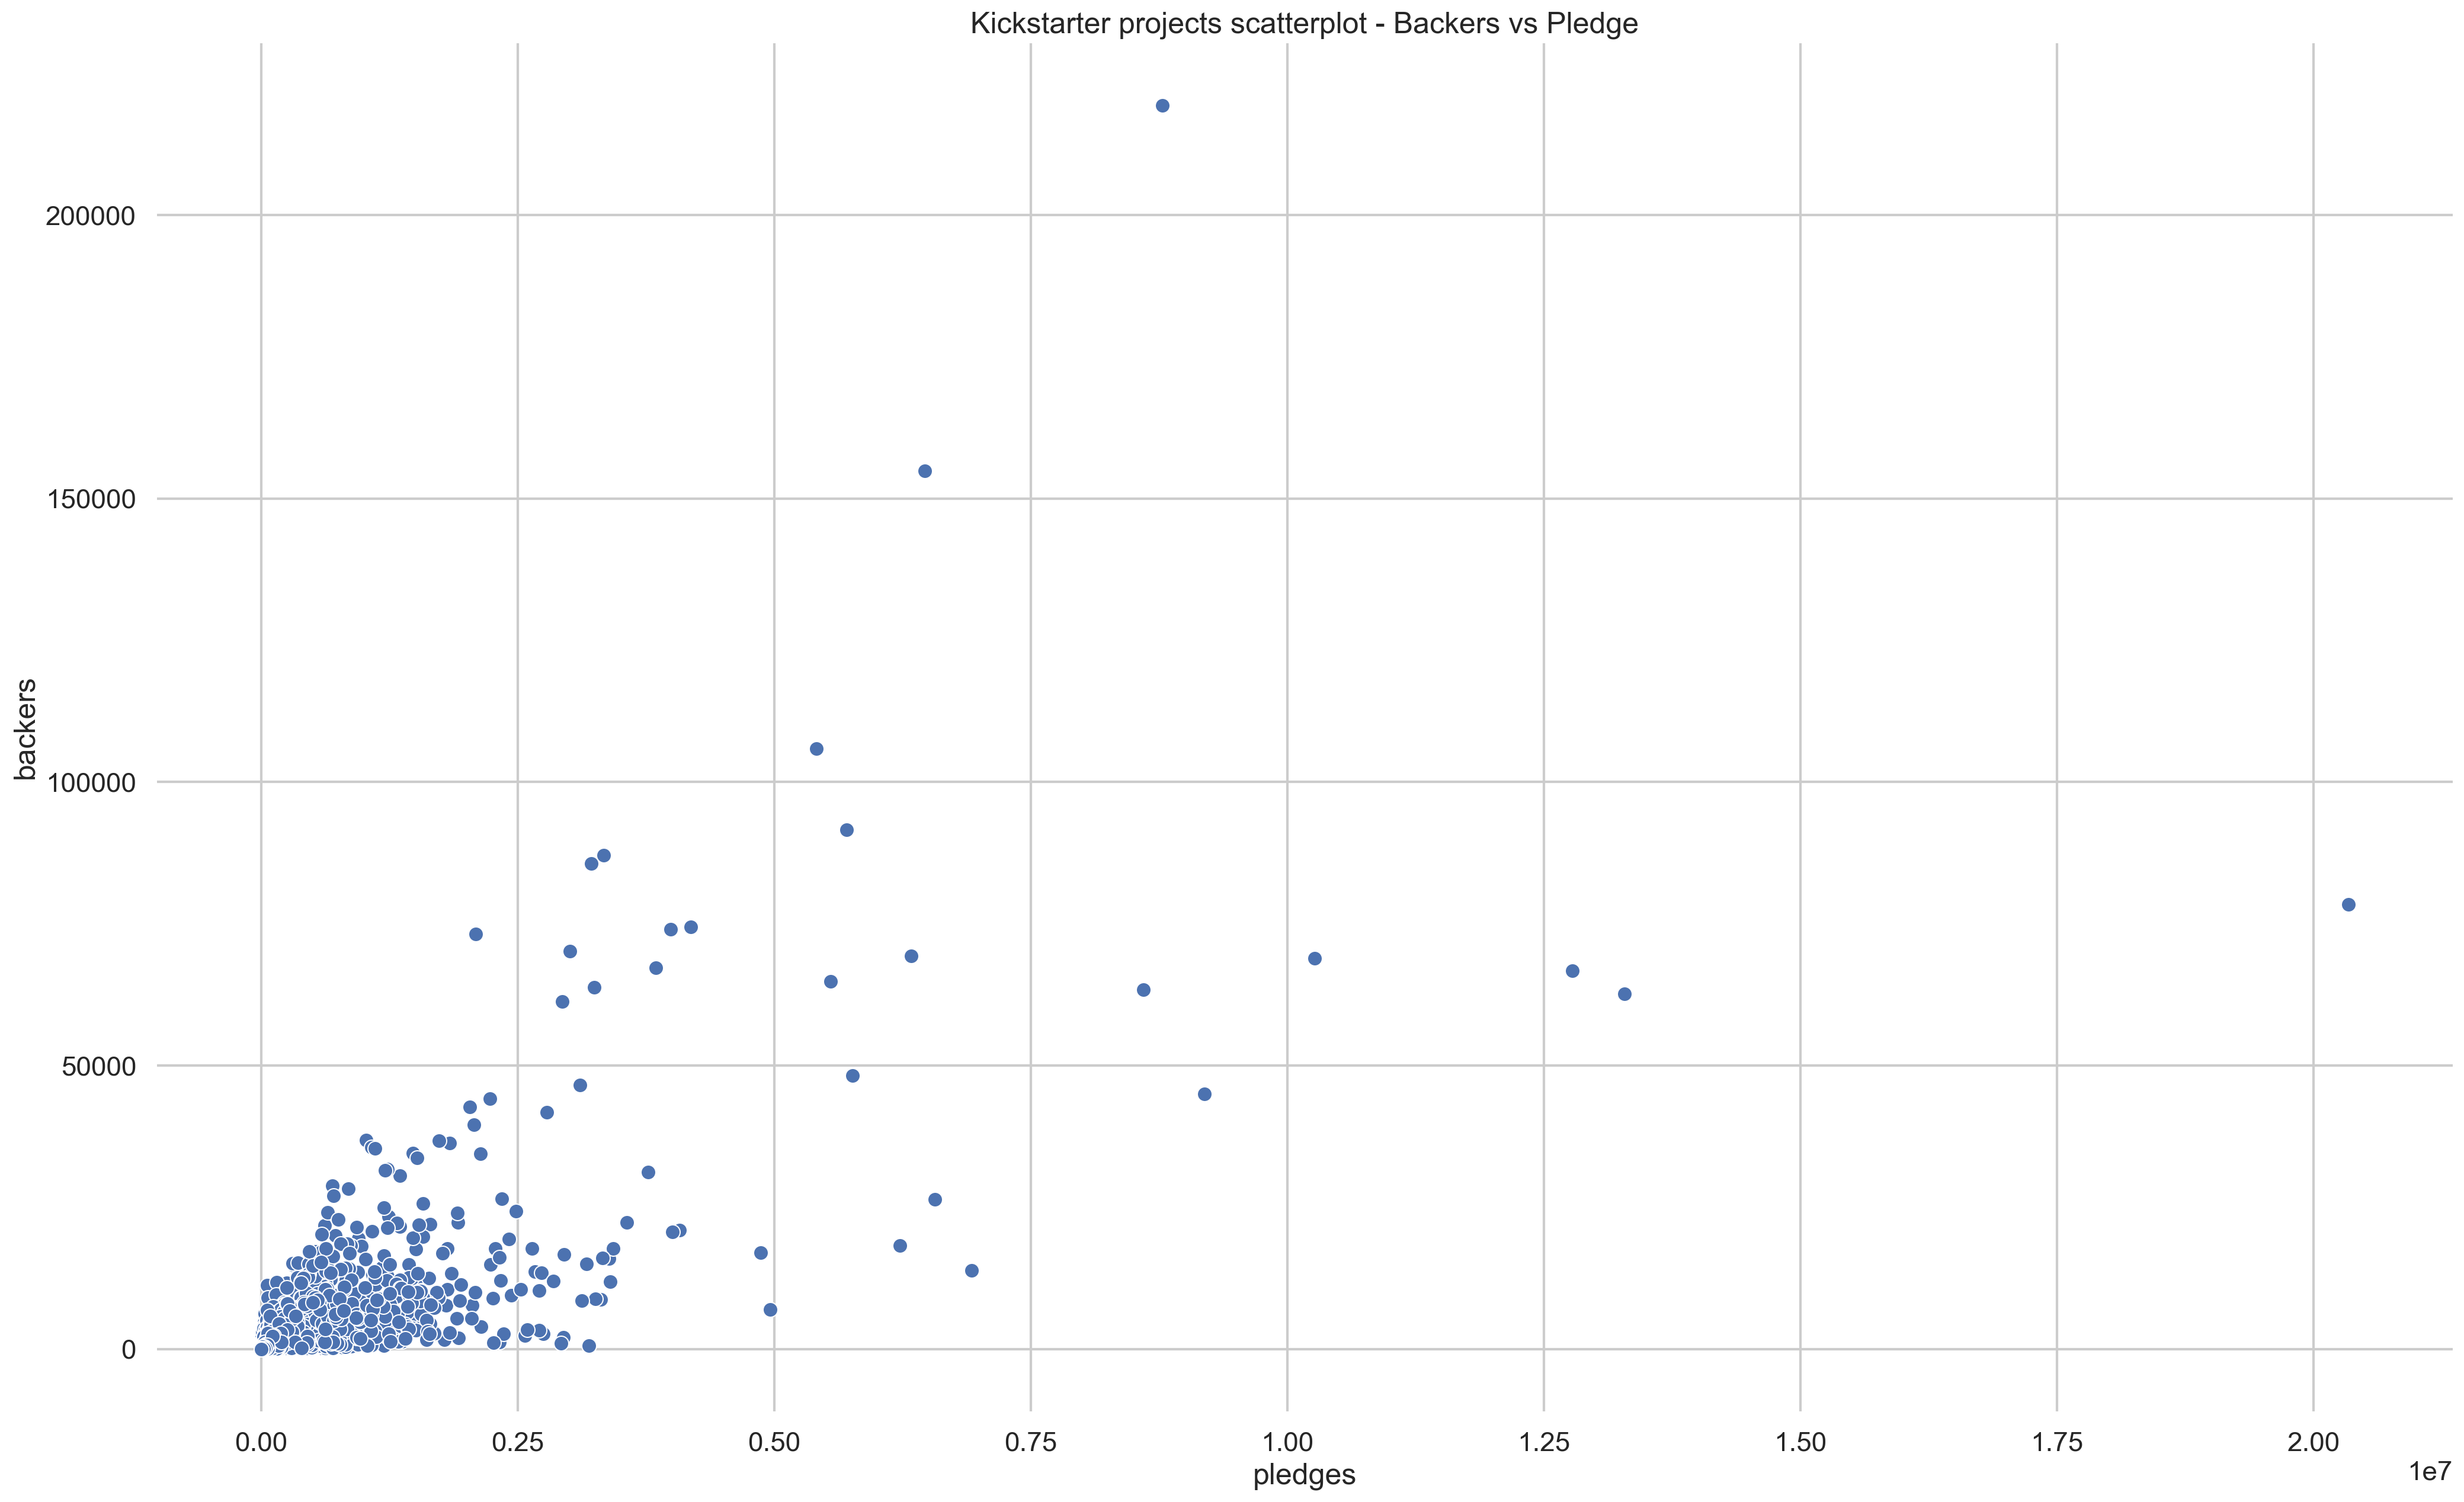

In [33]:
def is_float(n):
    try:
        float(n)
        return True
    except ValueError:
        return False


good_rows = [r for r in rows if r[header['backers']].isdigit() and is_float(r[header['pledged']])]
pledge_backers_rows = [r for r in good_rows if int(r[header['backers']]) > 0]

names = [r[header['name']] for r in pledge_backers_rows]
backers = [int(r[header['backers']]) for r in pledge_backers_rows]
pledges = [float(r[header['pledged']]) for r in pledge_backers_rows]

f, ax = plt.subplots(figsize=(25,15))
title = "Kickstarter projects scatterplot - Backers vs Pledge"

sns.scatterplot(x=pledges, y=backers)
sns.despine(left=True, bottom=True)
plt.title(title)
ax.set_xlabel("pledges")
ax.set_ylabel("backers");

Defining thresholds and plotting the names for the projects above the thresholds

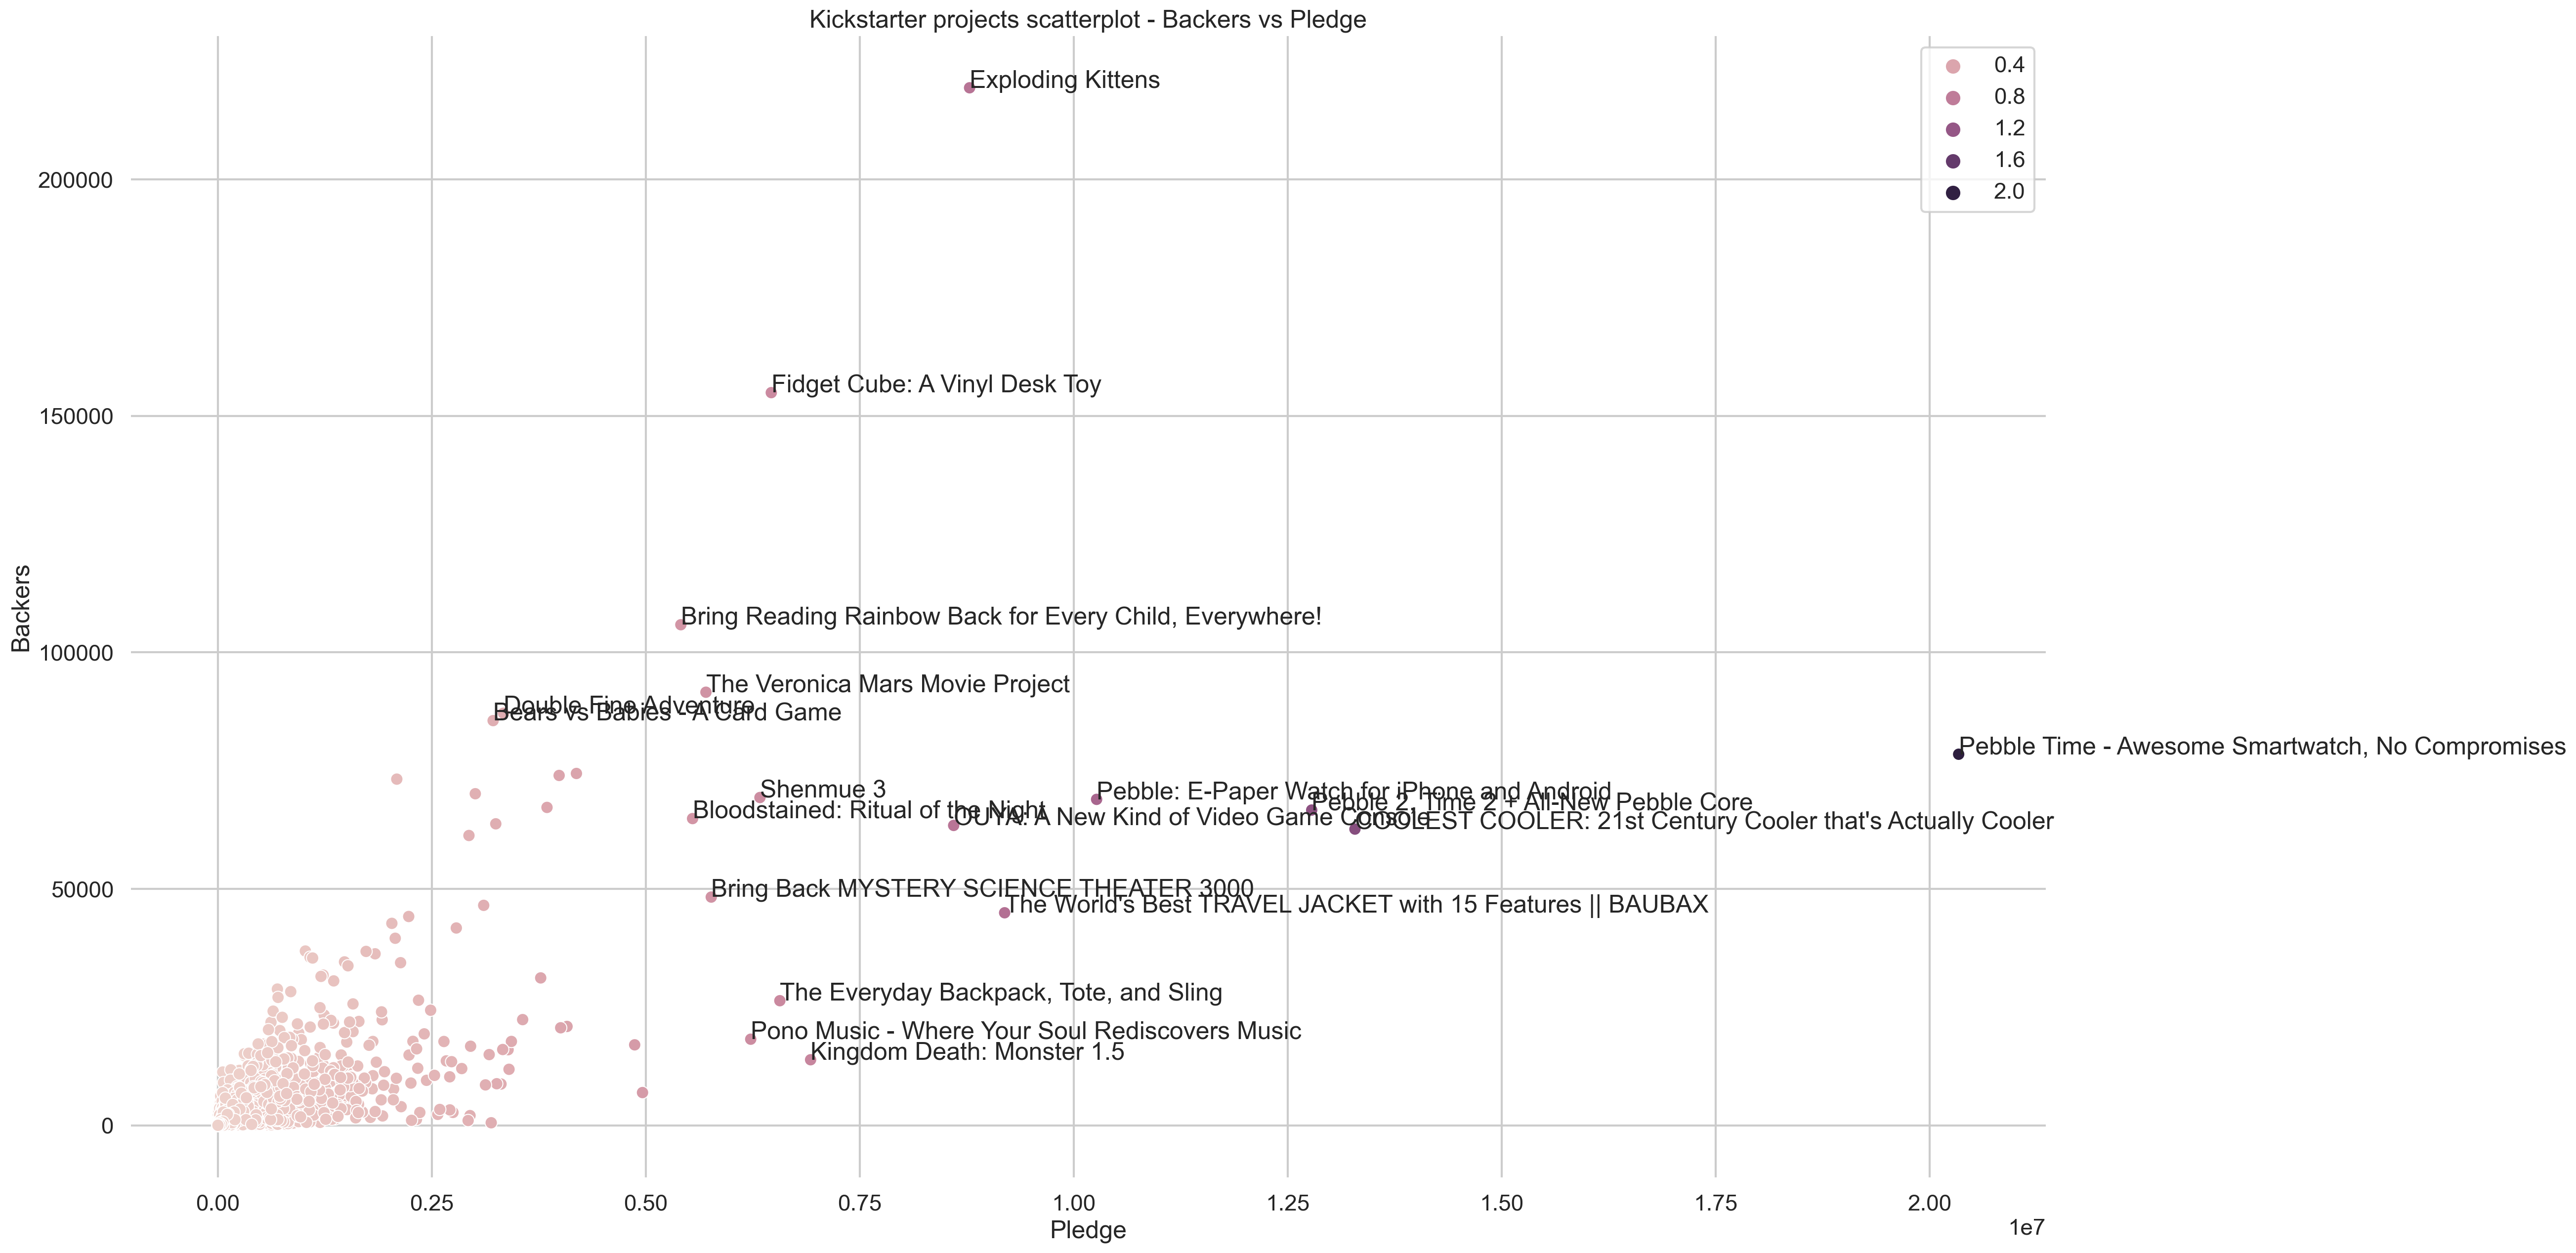

In [34]:
f, ax = plt.subplots(figsize=(25,15))
sns.scatterplot(x=pledges, y=backers, hue=pledges)
sns.despine(left=True, bottom=True)

ax.set_xlabel("Pledge")
ax.set_ylabel("Backers")
plt.title("Kickstarter projects scatterplot - Backers vs Pledge")

for i in range(len(names)):
    if pledges[i] > 5000000 or backers[i] > 75000:
        plt.annotate(names[i], (pledges[i], backers[i]))

In [35]:
header

{'ID': 0,
 'name': 1,
 'category': 2,
 'main_category': 3,
 'currency': 4,
 'deadline': 5,
 'goal': 6,
 'launched': 7,
 'pledged': 8,
 'state': 9,
 'backers': 10,
 'country': 11,
 'usd pledged': 12,
 'col_13': 13,
 'col_14': 14,
 'col_15': 15,
 'col_16': 16,
 'index': 17}

### Standardization problem

It turns out that the pledged column represent money but the currency can be different, so what we're comparing in the graph above are apples and oranges. We need to convert to a common currency. The data is already there in the `usd pledged` column

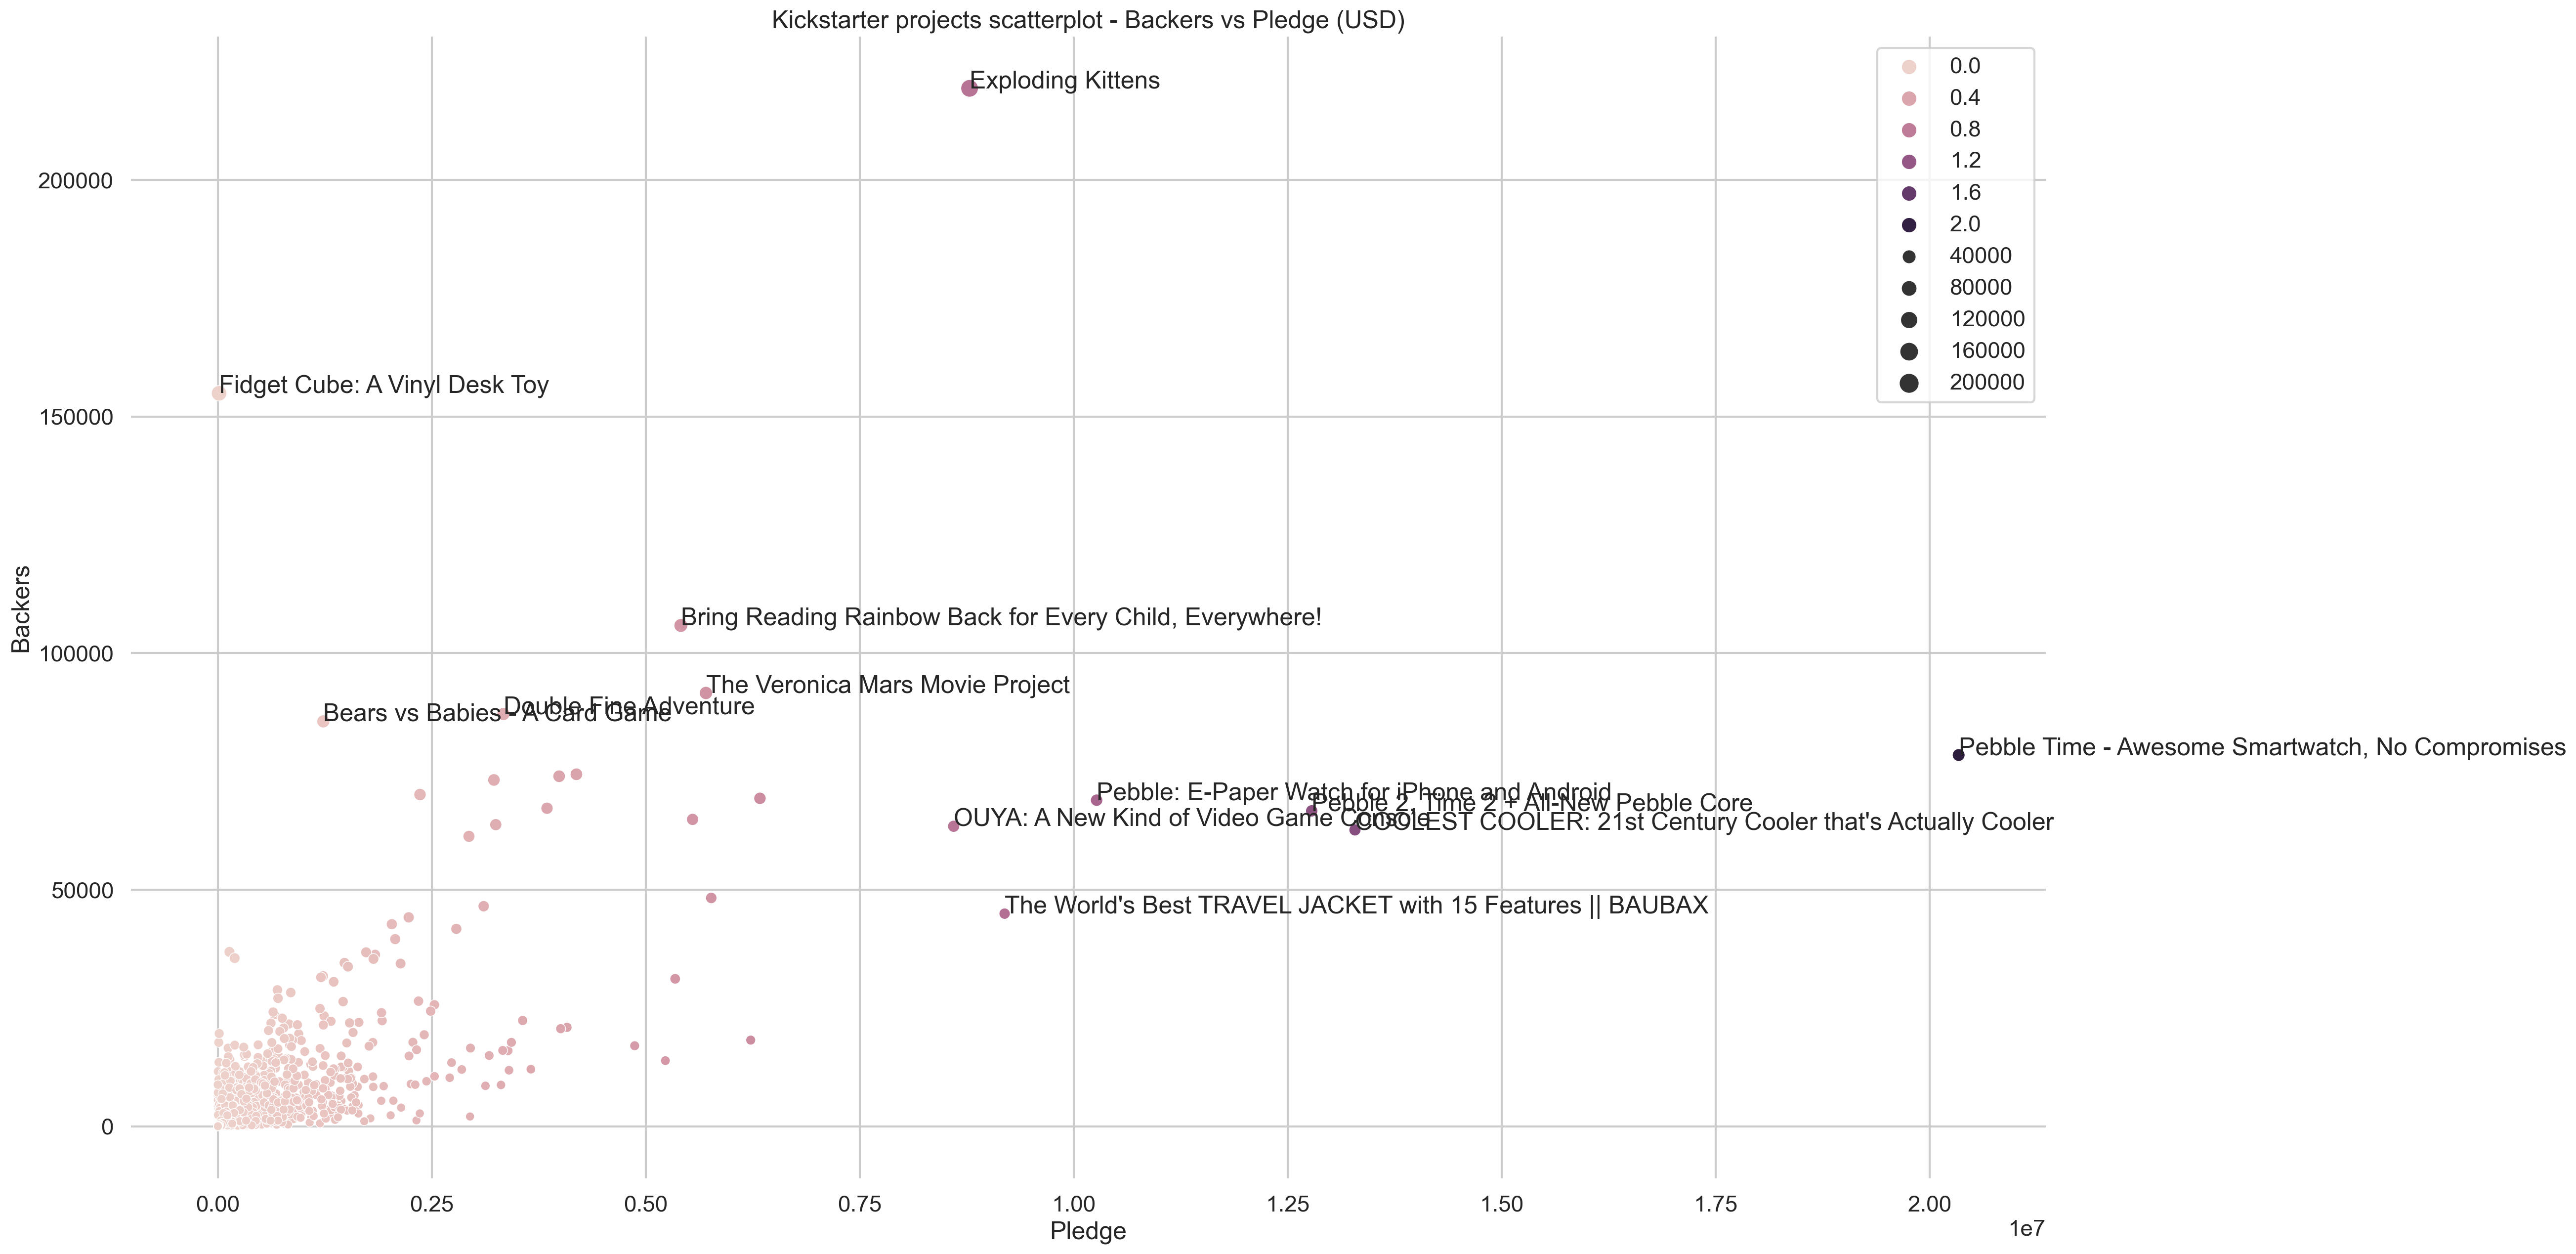

In [36]:
good_rows = [r for r in rows if r[header['backers']].isdigit() and is_float(r[header['usd pledged']])]
pledge_backers_rows = [r for r in good_rows if int(r[header['backers']]) > 0]

names = [r[header['name']] for r in pledge_backers_rows]
backers = [int(r[header['backers']]) for r in pledge_backers_rows]
pledges = [float(r[header['usd pledged']]) for r in pledge_backers_rows]

f, ax = plt.subplots(figsize=(25,15))
sns.scatterplot(x=pledges, y=backers, hue=pledges, size=backers)
sns.despine(left=True, bottom=True)

ax.set_xlabel("Pledge")
ax.set_ylabel("Backers");
plt.title("Kickstarter projects scatterplot - Backers vs Pledge (USD)")

for i in range(len(names)):
    if pledges[i] > 7500000 or backers[i] > 80000:
        plt.annotate(names[i], (pledges[i], backers[i]))
plt.show()

## Boxplot

A boxplot is a very compact visualization of a distribution, particularly useful to compare distributions, as multiple ones can be displayed in the same boxplot visualization.

Seaborn provides a simple api to create boxplots, based on Pandas dataframes or simple lists.

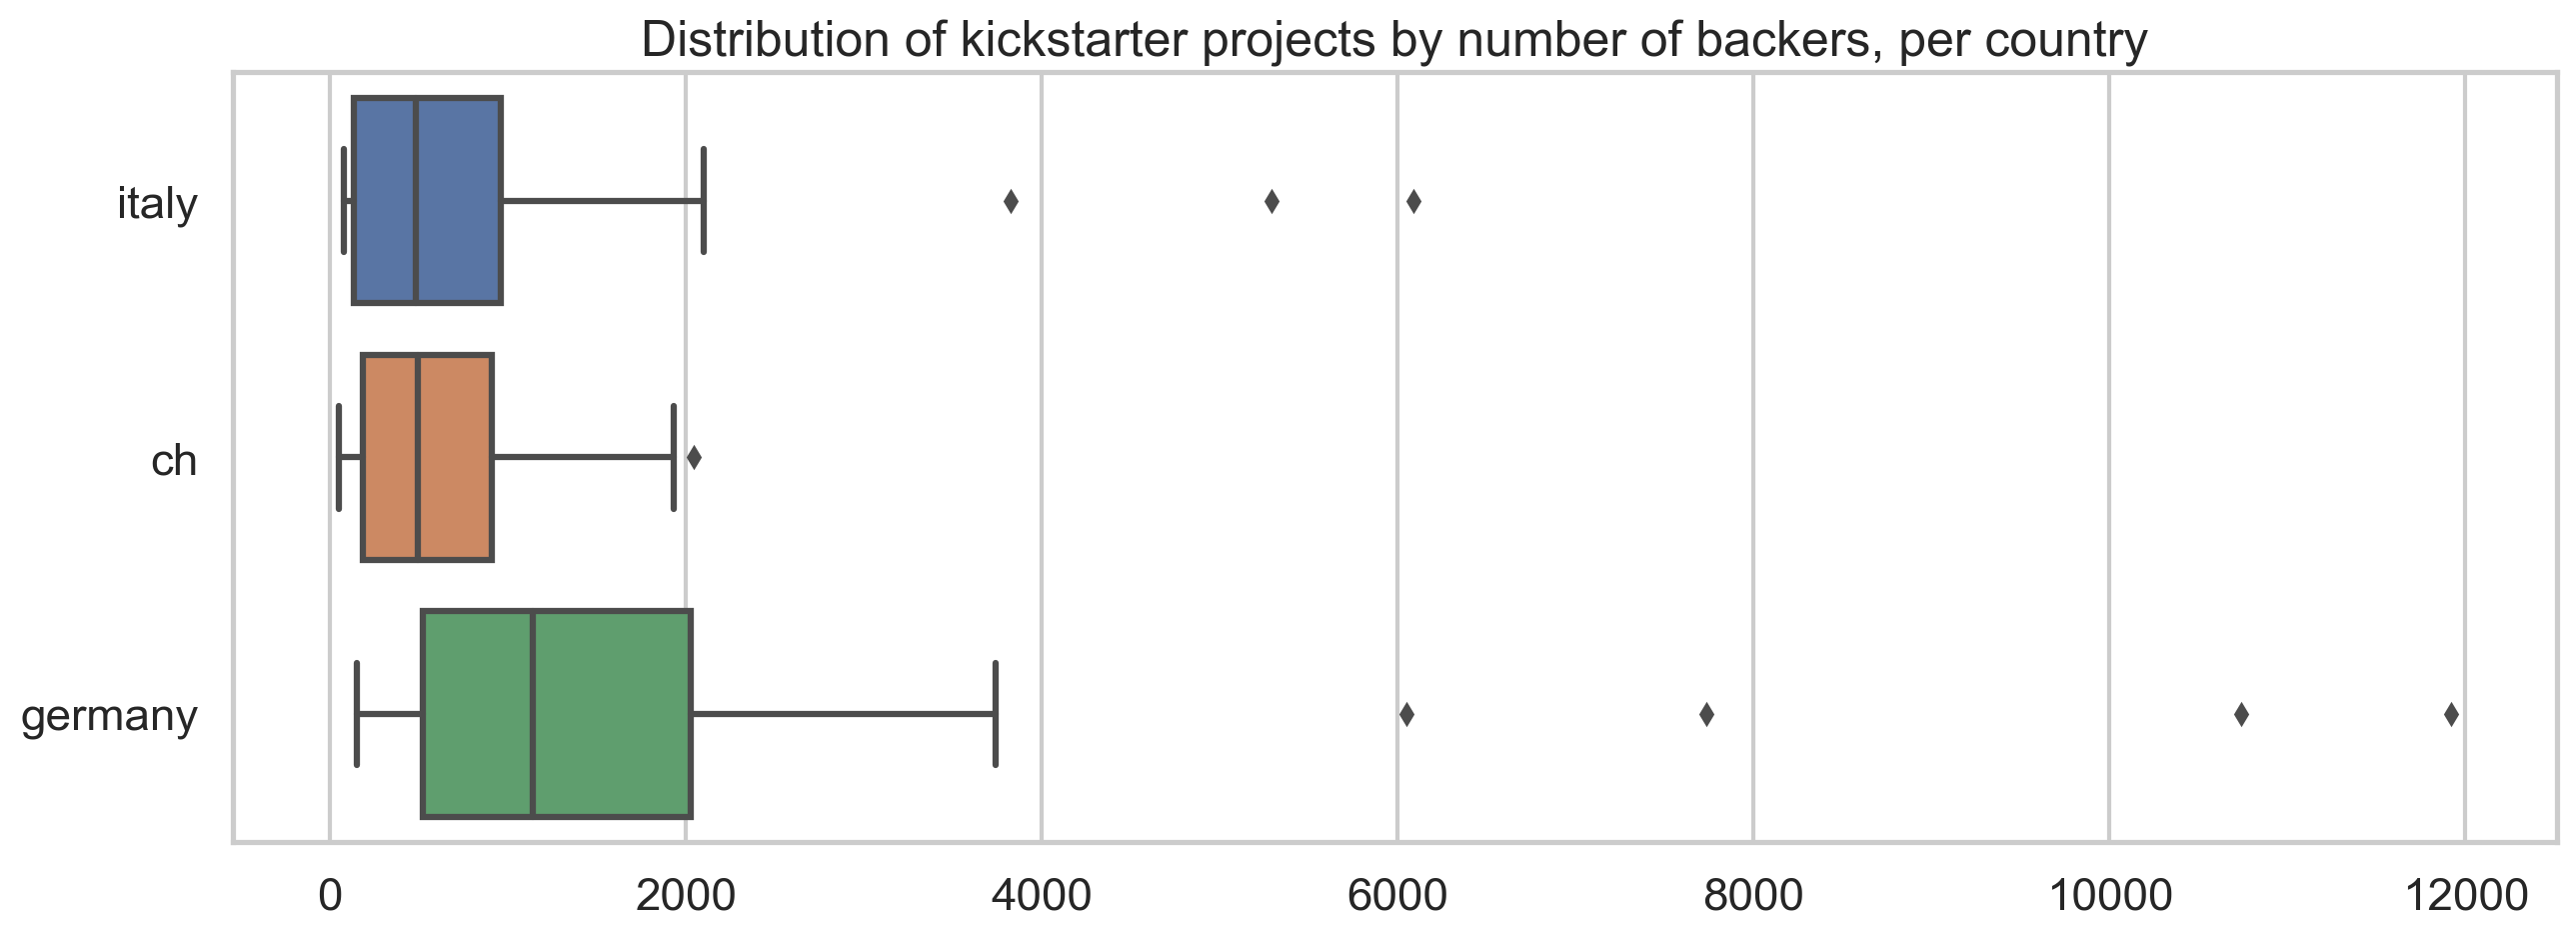

In [37]:
project_funded = [r for r in pledge_backers_rows if int(r[header['backers']]) > 0 and float(r[header['usd pledged']]) > 50000]

italy = [ int(row[header['backers']]) for row in project_funded if row[header["country"]] == "IT" ]
germany = [ int(row[header['backers']]) for row in project_funded if row[header["country"]] == "DE" ]
switzerland = [ int(row[header['backers']]) for row in project_funded if row[header["country"]] == "CH" ]

title = "Distribution of kickstarter projects by number of backers, per country"

plt.subplots(figsize=(15,5))
plt.title(title)
bp = sns.boxplot(data=[italy, switzerland, germany], orient="horizontal")

bp.set_yticklabels(["italy", "ch", "germany"]);

## Using ipywidgets

ipywidgets are eventful python objects that have a representation in the browser, often as a control like a slider, textbox, etc.

They can be used to build interactive GUIs for your notebooks.

Documentation: https://ipywidgets.readthedocs.io/en/stable/index.html

### Create a widget

The interact function is a shortcut that avoid the explict creation of widgets

In [38]:
from ipywidgets import widgets
from ipywidgets import interact

def f(x):
    print(x)

dropdown = interact(f, x=["a", "b", "c"])

interactive(children=(Dropdown(description='x', options=('a', 'b', 'c'), value='a'), Output()), _dom_classes=(…

The interact function creates a widget based on the input, e.g., dropdown for list, slider for integer, checkbox for boolean, text area for string, etc.
You can also explicitly create the widget, which allows you to have more control over its properties (for example set the description text) and have more granular access to the event handler.

In [39]:
dropdown = widgets.Dropdown(description="Category", options=[1,2,3])
display(dropdown)

def f2(change):
    if change.name == "value":
        print(change.new)

dropdown.observe(f2)


Dropdown(description='Category', options=(1, 2, 3), value=1)

## Putting it all together: an interactive barchart of categories per country

Using seaborn and ipywidgets create a simple dashboard that shows the most frequent categories of kickstarter projects. The information is shown per country and the dashboard includes a dropdown to select the country. Making a selection on the dropdown triggers the update of the corresponding chart.

## TO-DO

In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,3]

countries = [ 'AT', 'AU', 'BE', 'CA', 'CH', 'DE', 'DK', 'ES', 'FR', 'GB', 'HK', 'IE', 'IT', 'LU', 'MX', 'NL', 'NO', 'NZ', 'SE', 'SG', 'US']
good_country_rows = [row for row in rows if row[header['country']] in countries]

categories_per_country = {}

for country in countries:
    country_category = [row[header['main_category']] for row in rows if row[header['country']] == country]
    country_category_freq = {k:v for k,v in Counter(country_category).items()}
    categories_per_country[country] = country_category_freq

def plot_histogram_country(country):
    project_frequent_cat = categories_per_country[country]
    x = list(project_frequent_cat.keys())
    y = [project_frequent_cat[item] for item in x]    
    order = sorted(project_frequent_cat, key=project_frequent_cat.get, reverse=True)
    
    plot = sns.barplot(x=x, y=y, order=order, color="#478EB2")
    plot.set_xticklabels(labels=plot.get_xticklabels(), rotation='vertical')
    plt.title(f"Kickstart project in {country}: count plot")
    plt.ylabel("Number of projects")


g = interact(plot_histogram_country, country=countries)

NameError: name 'rows' is not defined